**Prepare the data**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_name = "/kaggle/input/olympics-2024/athletes new.csv"
df = pd.read_csv(file_name)
df.dtypes

code                  int64
name                 object
name_short           object
name_tv              object
gender               object
function             object
country_code         object
country              object
country_full         object
nationality          object
nationality_full     object
nationality_code     object
height                int64
weight              float64
disciplines          object
events               object
birth_date           object
dtype: object

In [3]:
countries = df["country"].unique()
country_codes = df["country_code"].unique()

**Where are the athletes from?**

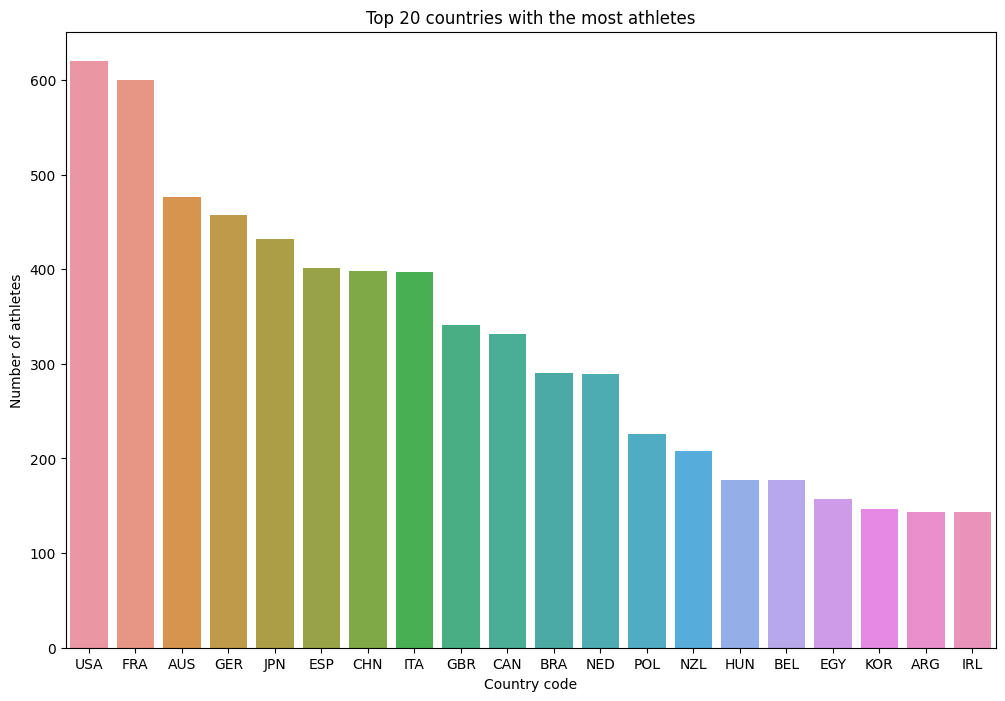

Index(['United States', 'France', 'Australia', 'Germany', 'Japan', 'Spain',
       'China', 'Italy', 'Great Britain', 'Canada', 'Brazil', 'Netherlands',
       'Poland', 'New Zealand', 'Hungary', 'Belgium', 'Egypt', 'Korea',
       'Argentina', 'Ireland'],
      dtype='object', name='country')


In [4]:

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='country_code', order=df["country_code"].value_counts().head(20).index)
plt.title('Top 20 countries with the most athletes')
plt.xlabel('Country code')
plt.ylabel('Number of athletes')
plt.show()
print(df["country"].value_counts().head(20).index)

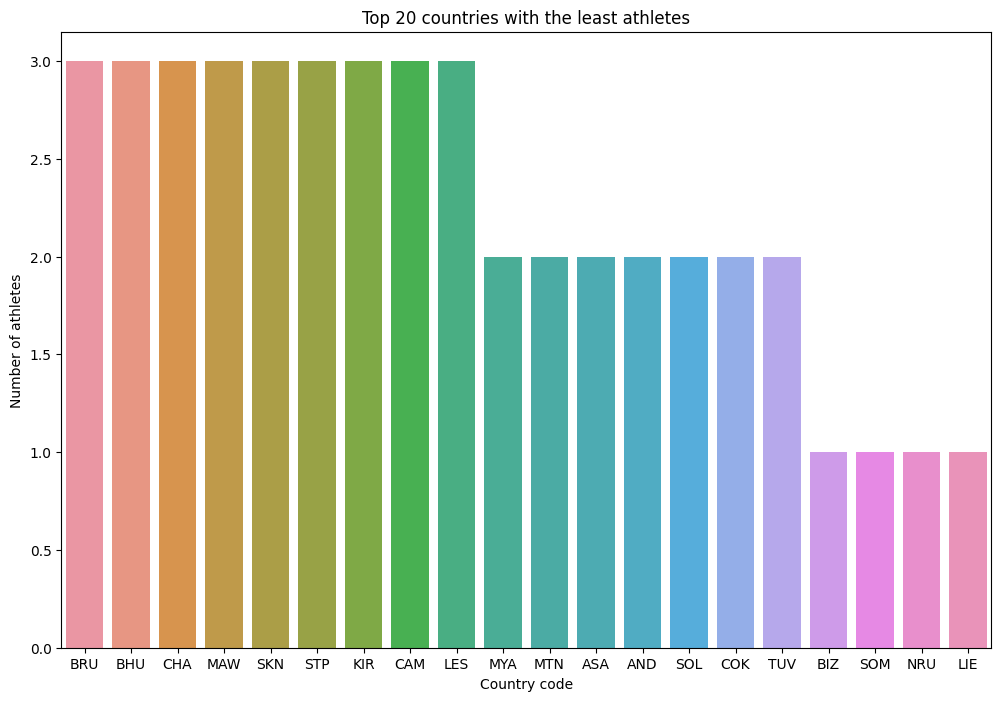

Index(['Brunei Darussalam', 'Bhutan', 'Chad', 'Malawi', 'St Kitts and Nevis',
       'Sao Tome & Principe', 'Kiribati', 'Cambodia', 'Lesotho', 'Myanmar',
       'Mauritania', 'American Samoa', 'Andorra', 'Solomon Islands',
       'Cook Islands', 'Tuvalu', 'Belize', 'Somalia', 'Nauru',
       'Liechtenstein'],
      dtype='object', name='country')


In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='country_code', order=df["country_code"].value_counts().tail(20).index)
plt.title('Top 20 countries with the least athletes')
plt.xlabel('Country code')
plt.ylabel('Number of athletes')
plt.show()
print(df["country"].value_counts().tail(20).index)

**Ratio of women to men**

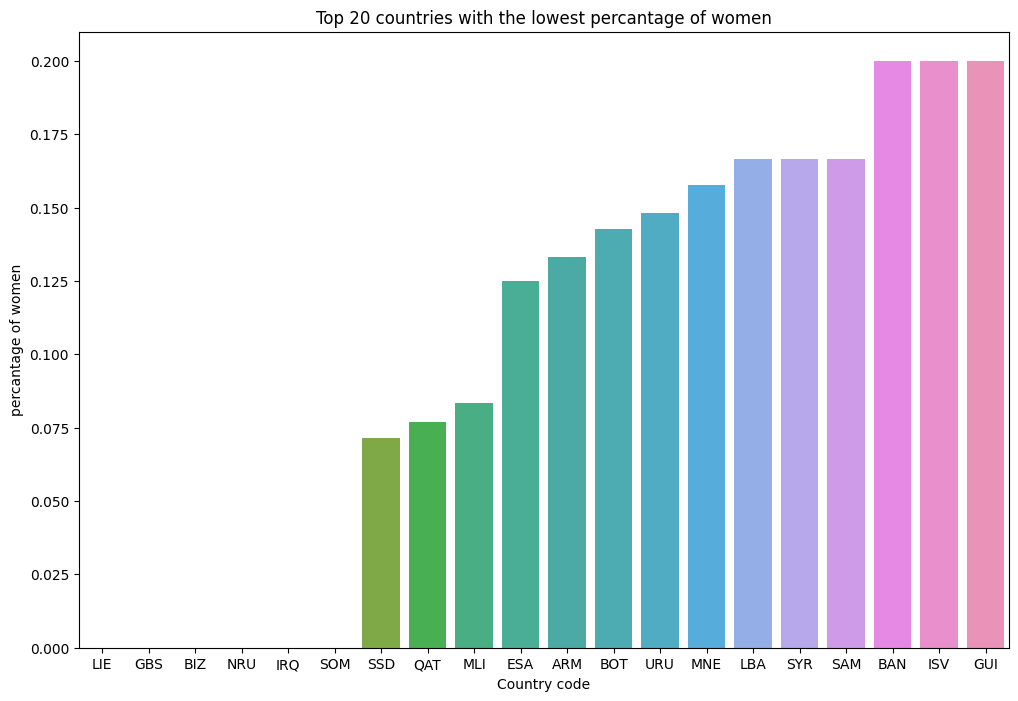

In [6]:
# A function to get the ratio of men to women
def w_m_ratio(dataframe):
    men = dataframe[dataframe["gender"]=="Male"]
    women = dataframe[dataframe["gender"]=="Female"]
    # len(men) / len(dataframe)
    return len(women) / len(dataframe)

ratio_w = []
for country in country_codes:
    ratio_w.append(w_m_ratio(df[df["country_code"] == country]))
    
gender_df = pd.DataFrame({"country_codes": country_codes, "ratio_w": ratio_w}).sort_values(by="ratio_w")

plt.figure(figsize=(12, 8))
sns.barplot(gender_df.head(20), x='country_codes', y="ratio_w")
plt.title('Top 20 countries with the lowest percantage of women')
plt.xlabel('Country code')
plt.ylabel('percantage of women')
plt.show()

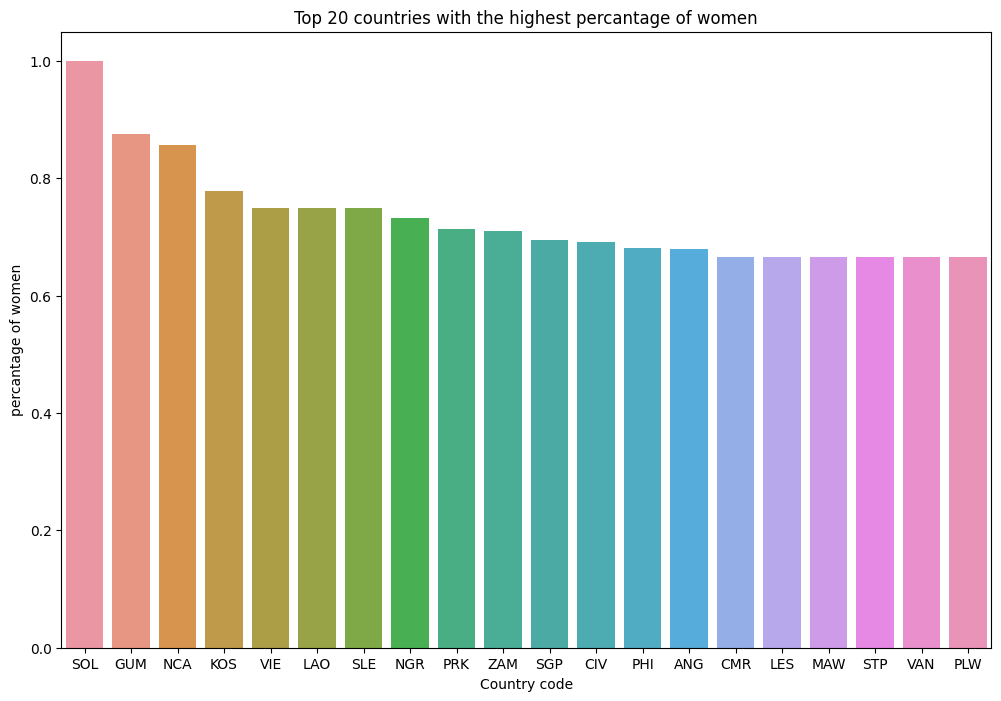

In [7]:
gender_df = pd.DataFrame({"country_codes": country_codes, "ratio_w": ratio_w}).sort_values(by="ratio_w")

plt.figure(figsize=(12, 8))
sns.barplot(gender_df.tail(20).iloc[::-1], x='country_codes', y="ratio_w")
plt.title('Top 20 countries with the highest percantage of women')
plt.xlabel('Country code')
plt.ylabel('percantage of women')
plt.show()

**Update 1 - disciplines**

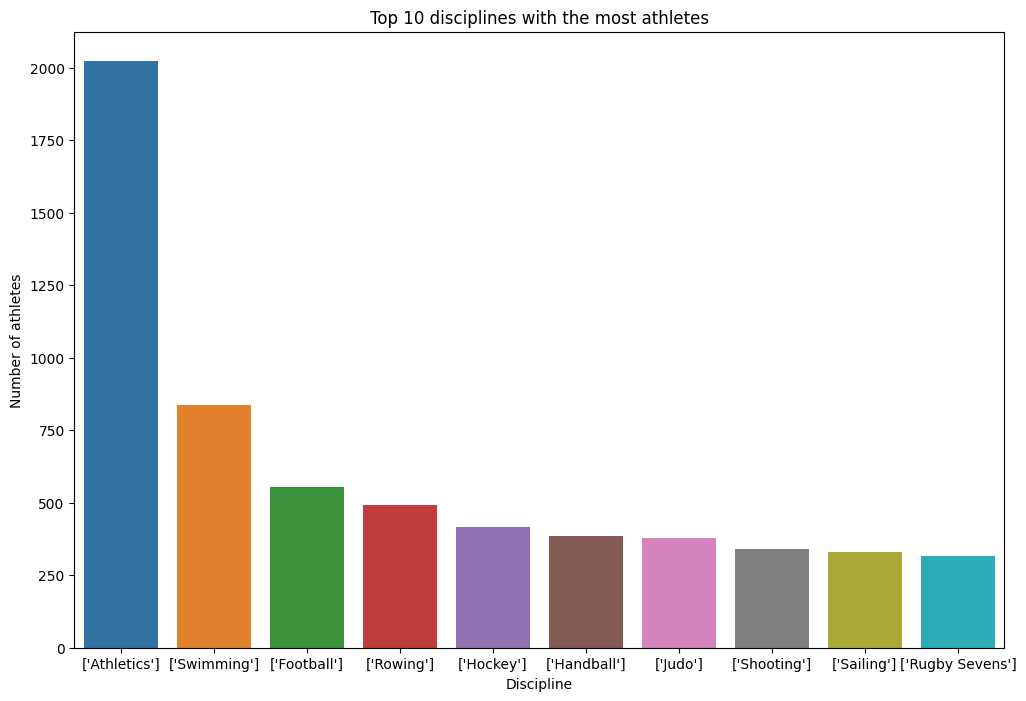

In [8]:

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='disciplines', order=df["disciplines"].value_counts().head(10).index)
plt.title('Top 10 disciplines with the most athletes')
plt.xlabel('Discipline')
plt.ylabel('Number of athletes')
plt.show()

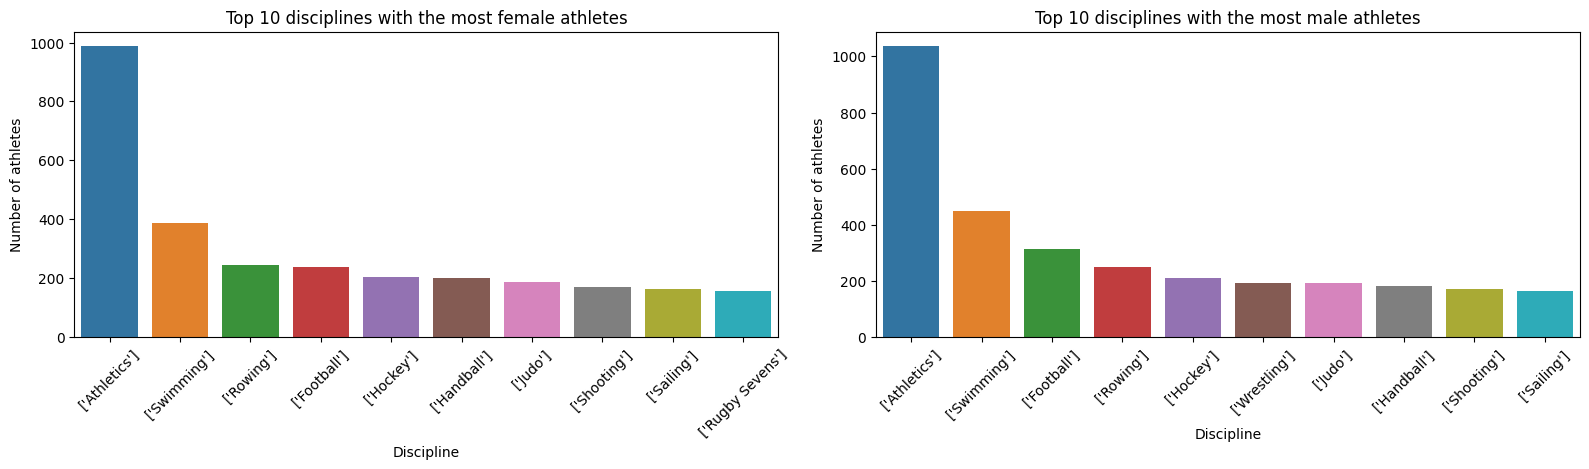

In [9]:
df_female = df[df["gender"]=="Female"]
df_male = df[df["gender"]=="Male"]

# Erstelle eine Figur mit zwei Subplots nebeneinander
plt.figure(figsize=(16, 8))

# female athletes
plt.subplot(2, 2, 1)
sns.countplot(data=df_female, x='disciplines', order=df_female["disciplines"].value_counts().head(10).index)
plt.title('Top 10 disciplines with the most female athletes')
plt.xlabel('Discipline')
plt.ylabel('Number of athletes')
plt.xticks(rotation=45)

# male athletes
plt.subplot(2, 2, 2)
sns.countplot(data=df_male, x='disciplines', order=df_male["disciplines"].value_counts().head(10).index)
plt.title('Top 10 disciplines with the most male athletes')
plt.xlabel('Discipline')
plt.ylabel('Number of athletes')
plt.xticks(rotation=45) 

# Layout anpassen
plt.tight_layout()
plt.show()

**Height and weight**

Text(0.5, 1.0, 'Distribution of height, by gender')

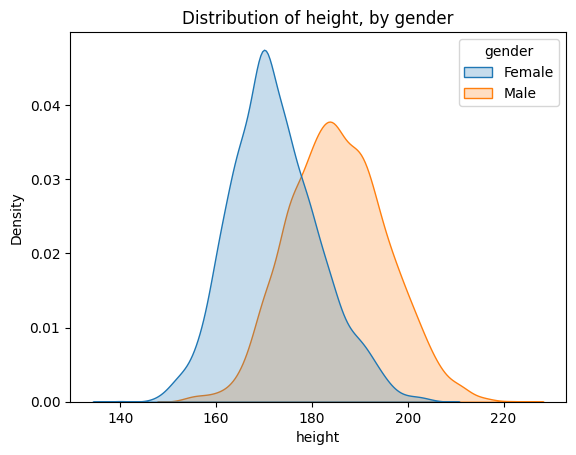

In [10]:
sns.kdeplot(data=df[df["height"] > 100], x='height', hue='gender', shade=True, common_norm=False)
plt.title("Distribution of height, by gender")

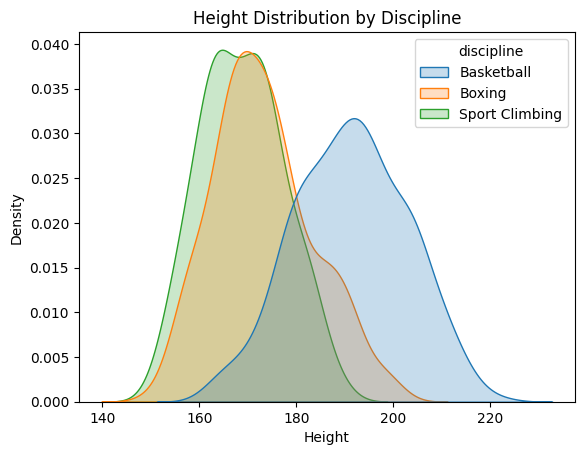

In [11]:
# Compare different disciplines in height
df_selected = df[df["disciplines"].str.contains("Basketball|Sport Climbing|Boxing")]

df_selected.loc[df_selected["disciplines"].str.contains("Basketball"), 'discipline'] = 'Basketball'
df_selected.loc[df_selected["disciplines"].str.contains("Sport Climbing"), 'discipline'] = 'Sport Climbing'
df_selected.loc[df_selected["disciplines"].str.contains("Boxing"), 'discipline'] = 'Boxing'


sns.kdeplot(data=df_selected[df_selected["height"] > 100], x='height', hue='discipline', shade=True, common_norm=False)


plt.title("Height Distribution by Discipline")
plt.xlabel("Height")
plt.ylabel("Density")

# Zeigen des Plots
plt.show()

Text(0.5, 1.0, 'Distribution of weight, by gender')

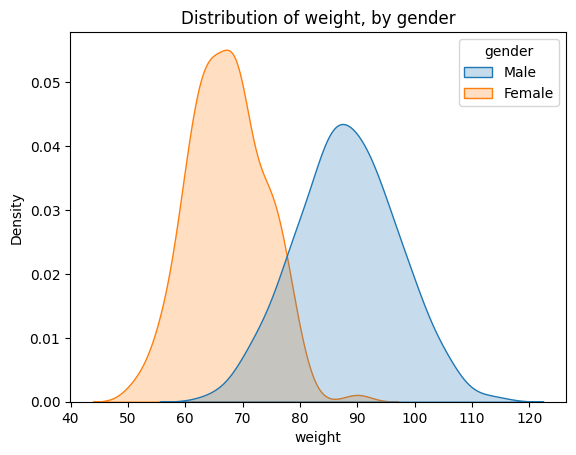

In [12]:
sns.kdeplot(data=df[df["weight"] > 10], x='weight', hue='gender', shade=True, common_norm=False)
plt.title("Distribution of weight, by gender")

**Age**

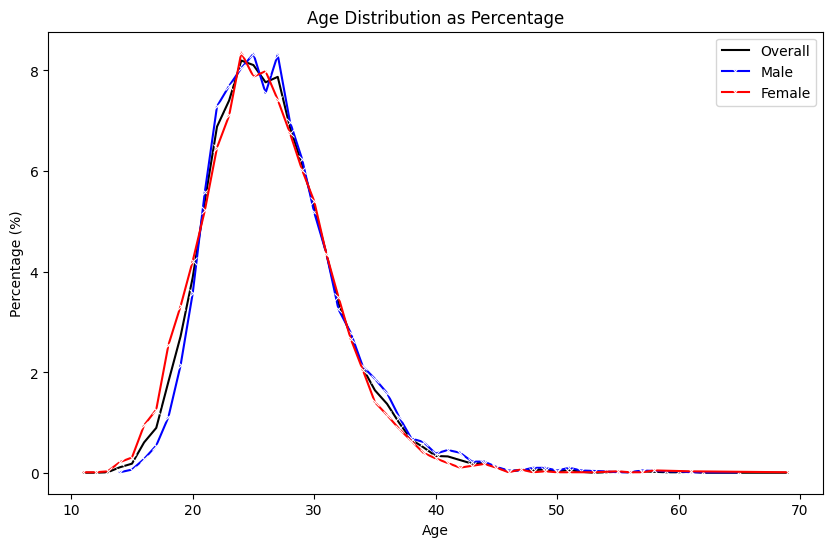

In [13]:
from datetime import datetime
def age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str,  '%Y-%m-%d')
    current_date = datetime.strptime("26.07.2024",  '%d.%m.%Y')
    age_int = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    return age_int

df_age = df.copy()
df_age["birth_date"] = df["birth_date"].apply(age)

age_counts = df_age['birth_date'].value_counts().sort_index()

age_counts_w = df_age[df_age["gender"]=="Female"]['birth_date'].value_counts().sort_index()
age_counts_m = df_age[df_age["gender"]=="Male"]['birth_date'].value_counts().sort_index()

age_counts_percentage = (age_counts / age_counts.sum()) * 100
age_counts_percentage_w = (age_counts_w / age_counts_w.sum()) * 100
age_counts_percentage_m = (age_counts_m / age_counts_m.sum()) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts_percentage.index, y=age_counts_percentage.values,color="black", label="Overall")
sns.lineplot(x=age_counts_percentage_m.index, y=age_counts_percentage_m.values,color="blue", marker="x", label="Male")
sns.lineplot(x=age_counts_percentage_w.index, y=age_counts_percentage_w.values,color="red", marker='x',  label="Female")

plt.legend()
plt.title('Age Distribution as Percentage')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')

plt.show()

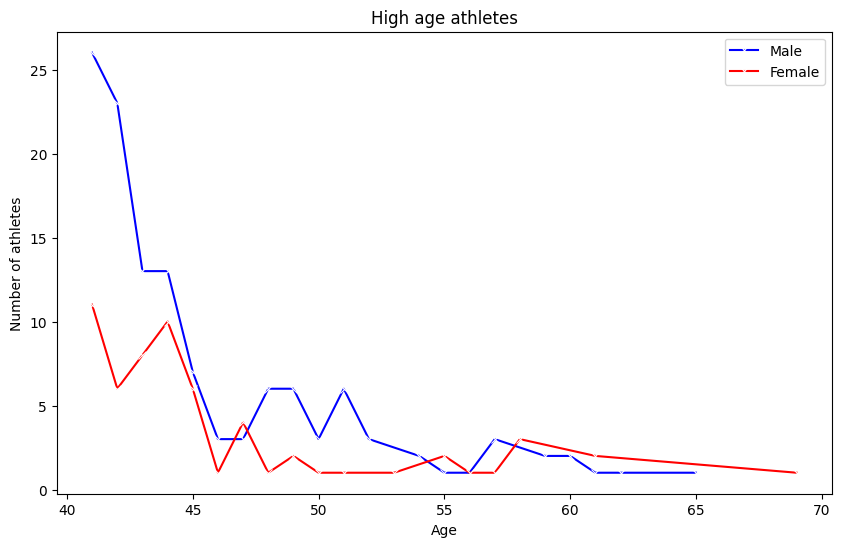

In [14]:
age_counts_w = df_age[(df_age["gender"]=="Female") & (df_age["birth_date"]> 40)]['birth_date'].value_counts().sort_index()
age_counts_m = df_age[(df_age["gender"]=="Male") & (df_age["birth_date"]> 40) ]['birth_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts_m.index, y=age_counts_m.values,color="blue", marker="x", label="Male")
sns.lineplot(x=age_counts_w.index, y=age_counts_w.values,color="red", marker='x',  label="Female")

plt.legend()
plt.title('High age athletes')
plt.xlabel('Age')
plt.ylabel('Number of athletes')

plt.show()

Feel free to leave an upvote or give me feedback. I'm also open to suggestions for improvement or new ideas for presenting data!
I'll be adding more updates in the coming days.